<a href="https://colab.research.google.com/github/Neo-Julio/ml4HepNotebook/blob/main/7_ML_competitionGiulio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Higgs Boson Detection 2024
*Searching for exotic particles in high-energy physics with machine learning*

## Overview
The goal of this competition is to classify events into two classes: events that produce the exotic Higgs Boson particle, and those that do not. Each event is a simulated particle collision represented by 28 features that describe the trajectories of decay particles. These are realistic simulations of particle collisions occuring in the ATLAS detector at the Large Hadron Collider at CERN, near Geneva, Switzerland.

An analysis like this was used to discover the Higgs Boson in 2012; a machine learning classifier was trained on simulation and calibration data, then used to analyze real data from the experiment. Improved machine learning methods for this type of data could enable physicists to make new discoveries faster. It is thought that there are additional particles yet to be discovered, so more sensitive machine learning methods could help scientists discover new physics.

## Dataset

This data set is a sample from the HIGGS data set published with [Baldi, Sadowski, and Whiteson, Searching for Exotic Particles in High-Energy Physics with Deep Learning](https://www.nature.com/articles/ncomms5308) and available [here](https://archive.ics.uci.edu/ml/datasets/HIGGS).

In [1]:
%%bash
mkdir -p data

In [2]:
!wget "https://archive.ics.uci.edu/static/public/280/higgs.zip" -P data -q --show-progress

higgs.zip               [            <=>     ]   2.62G  4.74MB/s    in 4m 42s  


In [3]:
!unzip data/higgs.zip

Archive:  data/higgs.zip
  inflating: HIGGS.csv.gz            


In [4]:
!gzip -d HIGGS.csv.gz

In [5]:
!ls

data  HIGGS.csv  sample_data


In [6]:
#Load the dataset using pandas and numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [19]:
column_names = ['lable', 'lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
                'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [8]:
df = pd.read_csv('HIGGS.csv', header=None, nrows=200000)
df.columns=column_names

Added some visualizations to understand the features distributions

In [20]:
df.head()

,lable,lep_pt,lep_eta,lep_phi,MET,MET_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [21]:
features_low = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag']

features_high = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

features = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
            'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
            'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
            'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
            'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
            'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

Added a further splitting for validation and a scaler to normalize the data to a gaussian centered in 0

In [22]:
#split in training test and validation + scaler to a gaussian centered in 0 and
#sigma = 1

y = df['lable'].values
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_val = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train, test_size=0.2, random_state=7
)

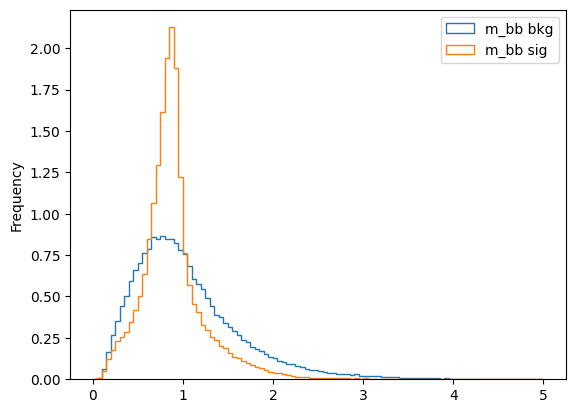

In [23]:
import matplotlib.pyplot as plt

#plot a few features
var_name = 'm_bb'
ax = df[df['lable']==0].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density=True)
#ax.set_yscale('log')
df[df['lable']==1].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density = True, ax=ax)
ax.legend(labels=[var_name+' bkg', var_name+' sig'])

In [13]:
#find a classification algorithm to solve this classification problem. THe metrics is the area under the ROC with the test set
# DNN with a sigmoid o BDT


In [14]:
# Enjoy!

 l have used a  use a deep feedforward neural network for binary classification. The architecture processes 28 input features and passes them through three hidden layers before reaching a final output neuron. Batch normalization is applied after each hidden linear transformation to stabilize and accelerate training. The non-linear activation function used is ReLU, and a dropout regularization layer is introduced to prevent overfitting. The output layer consists of a single neuron with a sigmoid activation function to produce probability outputs between 0 and 1.



In [32]:
# Define the model: 28 → 32 → 16 → 8 → 1 with relu activations. Added a small dropout to prevent overfitting https://docs.pytorch.org/docs/stable/generated/torch.nn.Dropout.html
import torch
import torch.nn as nn

# Define the model: 28 → 16 → 8 → 1 with activations
model = nn.Sequential(
    nn.Linear(28, 32),
    nn.ReLU(),
    nn.Dropout(0.05),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()  # For binary classification
)


# Define loss function: Binary Cross-Entropy
loss_fn = nn.BCELoss()

#played with the parameters of the ADAM otpimizer.
# Define optimizer: Adam
learning_rate = 0.00005
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(
    model.parameters(),
   learning_rate,
    betas=(0.8, 0.98),
    eps=1e-8,
    weight_decay=1e-4
)

#added a scheduler to leduce the learning rate of a factor 0.5 if the
#val_loss doesn't improve for 10 epochs
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',         # we want to minimize val_loss
    factor=0.5,         # reduce LR by half
    patience=10,        # wait 10 epochs of no improvement

)

In [33]:
# Get validation data ready
val_data = torch.from_numpy(X_val).float()
val_label = torch.from_numpy(y_val).float()

In [34]:
from tqdm import tqdm  # for progress bar while training
# Tracking loss values
losses, val_losses = [], []
batch_size = 1024
#batch_size = 512
min_loss = float('inf')
stale_epochs = 0
#n_epochs = 500
for t in tqdm(range(600)):
    model.train()
   # batch_loss = []
    batch_loss, val_batch_loss = [], []
    # Shuffle training data at each epoch (optional but recommended)
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_train = X_train[indices]
    y_train = y_train[indices]

    # Mini-batch training loop
    for b in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[b : b + batch_size]
        Y_batch = y_train[b : b + batch_size]

        x = torch.from_numpy(X_batch).float()
        y = torch.from_numpy(Y_batch).float().view(-1, 1)

        # Forward pass
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        batch_loss.append(loss.item())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Store average training loss for the epoch
    losses.append(np.mean(batch_loss))

    # Validation loss (once per epoch)
    model.eval()
    with torch.no_grad():
        output = model(val_data)
        val_y = val_label.view_as(output)
        val_loss = loss_fn(output, val_y)
        val_losses.append(val_loss.item())

   #scheduler to adjust the learning rate during training.
    scheduler.step(val_loss.item())
    # Early stopping
    if val_loss.item() < min_loss:
        min_loss = val_loss.item()
        stale_epochs = 0
        torch.save(model.state_dict(), "pytorch_model_best.pth")
    else:
        stale_epochs += 1

    if stale_epochs > 20:
        print(f"Early stopping at epoch {t} (val_loss didn't improve for 20 epochs)")
        break

100%|██████████| 600/600 [03:49<00:00,  2.61it/s]


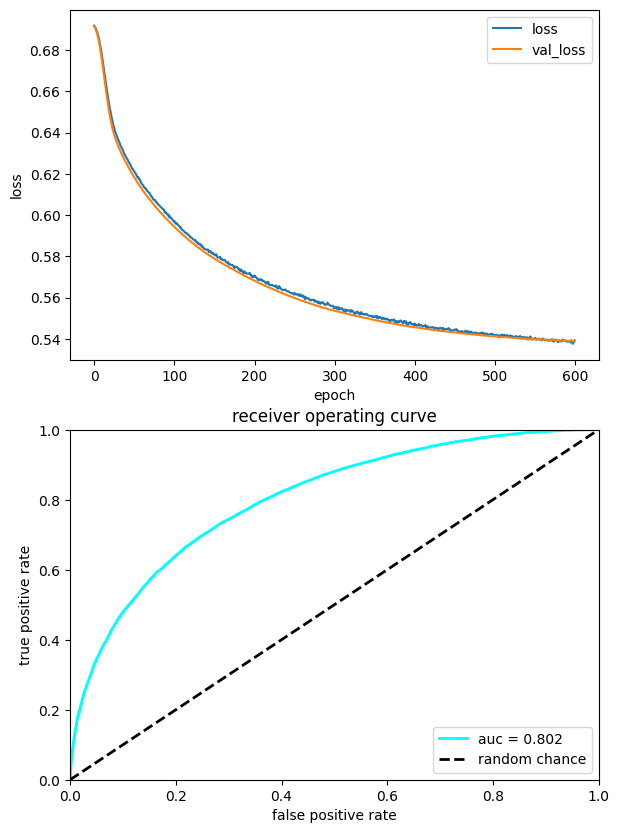

In [35]:
import matplotlib.pyplot as plt

%matplotlib inline

with torch.no_grad():
    # plot loss vs epoch
    plt.figure(figsize=(15, 10))
    ax = plt.subplot(2, 2, 1)
    ax.plot(losses, label="loss")
    ax.plot(val_losses, label="val_loss")
    ax.legend(loc="upper right")
    ax.set_xlabel("epoch")
    ax.set_ylabel("loss")

    # Plot ROC
    X_test_in = torch.from_numpy(X_test).float()
    y_predict = model(X_test_in)
    y_predict = y_predict.numpy().ravel()
    from sklearn.metrics import roc_curve, auc

    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    roc_auc = auc(fpr, tpr)
    ax = plt.subplot(2, 2, 3)
    ax.plot(fpr, tpr, lw=2, color="cyan", label="auc = %.3f" % (roc_auc))
    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="k", label="random chance")
    ax.set_xlim([0, 1.0])
    ax.set_ylim([0, 1.0])
    ax.set_xlabel("false positive rate")
    ax.set_ylabel("true positive rate")
    ax.set_title("receiver operating curve")
    ax.legend(loc="lower right")
    plt.show()